In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0'

In [ ]:
!pip install llama-index-multi-modal-llms-gemini
!pip install llama-index-llms-gemini

## Approach-1 Using Image URL

In [1]:
import os
from getpass import getpass

google_api_key = getpass()
os.environ['GOOGLE_API_KEY'] = google_api_key

··········


In [2]:
IMAGE_URL = "https://images.unsplash.com/photo-1668441126118-7ba4c6bac1b5?q=80&w=3498&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

Image Credits: Photo by <a href="https://unsplash.com/@wahid_sadiq?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Wahid Sadiq</a> on <a href="https://unsplash.com/photos/a-clock-and-a-book-rnT6PRoNz18?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

import requests
from io import BytesIO

(-0.5, 3497.5, 2391.5, -0.5)

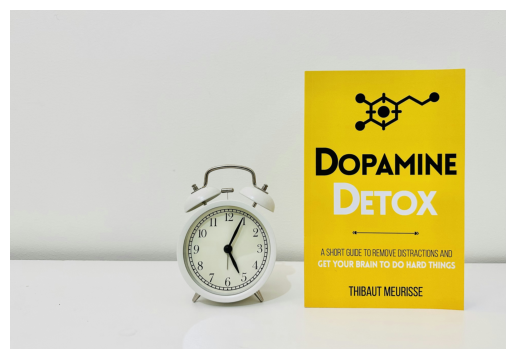

In [4]:
response = requests.get(IMAGE_URL)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis("off")

In [5]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

## Display available models

In [6]:
import google.generativeai as genai

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Load the Model and Image.

Note, copy the model path as displayed above. Since we are using Multimodal Quickstart, pick a model that supports `vision`

In [7]:
image_document1 = load_image_urls([IMAGE_URL])

In [8]:
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

In [9]:
response = gemini_pro.complete(
    prompt = "whats the name of the book and whats the time displayed in the clock?",
    image_documents = image_document1
)

In [10]:
print(response)

 The book is called "Dopamine Detox". The clock is showing 5:03.


## Approach-2 Using Image File



Note, create a folder with the name data and same any image of your choice and execute `SimpleDirectoryReader`

In our case, we downloaded a Photo by <a href="https://unsplash.com/@shotbyjudeus?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Judeus Samson</a> on <a href="https://unsplash.com/photos/man-wearing-spider-man-costume-standing-on-sidewalk-with-cars-on-roadway-tI6m-AXpAsg?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a> and saved inside data folder.

Image URL: [spiderman.jpg](https://images.unsplash.com/photo-1534375971785-5c1826f739d8?q=80&w=3540&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)
  

(-0.5, 5183.5, 3455.5, -0.5)

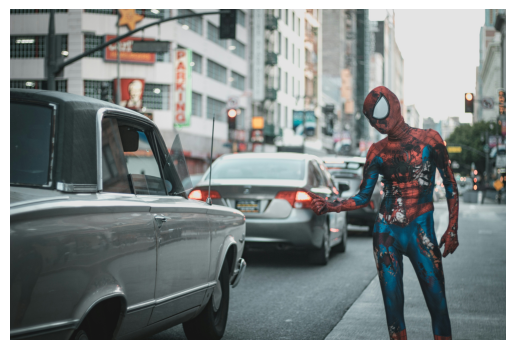

In [11]:
img2 = Image.open("./data/spiderman.jpg")
plt.imshow(img2)
plt.axis("off")

In [13]:
from llama_index.core import SimpleDirectoryReader

image_document2 = SimpleDirectoryReader("./data").load_data()

In [14]:
response2 = gemini_pro.complete(
    prompt = "identify the superhero and write a joke on it",
    image_documents=image_document2
)

In [15]:
print(response2)

 That's not Spider-Man, that's just some guy in a costume.
Joke: What do you call Spider-Man when he's had too much to drink?
Answer: Peter Parker
